# KDD Cup 1999: Computer Network Intrusion Detection

> The task for the classifier learning contest organized in conjunction with the KDD'99 conference was to learn a predictive model (i.e. a classifier) capable of distinguishing between legitimate and illegitimate connections in a computer network.

- Attacks fall into four main categories: denial-of-service, unauthorized access from a remote machine, unauthorized access to local superuser (root) privileges, and probing.

- The datasets contain a total of 24 training attack types, with an additional 14 types in the test data only.

Source: http://www.kdd.org/kdd-cup/view/kdd-cup-1999/Tasks

In [1]:
import requests, zipfile, io

req_kdd = requests.get('http://kdd.org/cupfiles/KDDCupData/1999/kddcup.data_10_percent.zip')
zip_kdd = zipfile.ZipFile(io.BytesIO(req_kdd.content))
file = zip_kdd.open("kddcup.data_10_percent.txt")

In [2]:
import pandas as pd

columns = ["duration","protocol_type","service","flag","src_bytes", "dst_bytes","land",
        "wrong_fragment","urgent","hot","num_failed_logins", "logged_in","num_compromised",
        "root_shell","su_attempted","num_root", "num_file_creations","num_shells",
        "num_access_files","num_outbound_cmds", "is_host_login","is_guest_login","count",
        "srv_count","serror_rate", "srv_serror_rate","rerror_rate","srv_rerror_rate",
        "same_srv_rate", "diff_srv_rate","srv_diff_host_rate","dst_host_count",
        "dst_host_srv_count", "dst_host_same_srv_rate","dst_host_diff_srv_rate",
        "dst_host_same_src_port_rate", "dst_host_srv_diff_host_rate","dst_host_serror_rate",
        "dst_host_srv_serror_rate", "dst_host_rerror_rate","dst_host_srv_rerror_rate","TARGET"]

dataset = pd.read_csv(file, header=None, names=columns, low_memory=False)
dataset.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,TARGET
0,0,tcp,http,SF,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.


## Exploratory Analysis

In [3]:
print('10% of the data is {} data points and has {} columns.'.format(len(dataset), len(dataset.columns)), end='\n\n')
print('Missingness: ', end='\n\n')
print(dataset.isnull().sum())

10% of the data is 494021 data points and has 42 columns.

Missingness: 

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
sa

In [4]:
print('There are {} unique targets.'.format(len(dataset.TARGET.unique())), end='\n\n')
dataset.TARGET.value_counts(normalize=True)

There are 24 unique targets.



smurf.              0.568377
neptune.            0.216997
normal.             0.196909
back.               0.004459
satan.              0.003216
ipsweep.            0.002524
portsweep.          0.002105
warezclient.        0.002065
teardrop.           0.001982
pod.                0.000534
nmap.               0.000468
guess_passwd.       0.000107
buffer_overflow.    0.000061
land.               0.000043
warezmaster.        0.000040
imap.               0.000024
rootkit.            0.000020
loadmodule.         0.000018
ftp_write.          0.000016
multihop.           0.000014
phf.                0.000008
perl.               0.000006
spy.                0.000004
0.00                0.000002
Name: TARGET, dtype: float64

In [5]:
# Adjusted Baseline Accuracy
dataset['BINARY_TARGET'] = dataset['TARGET'].map(lambda x: x if x=='normal.' else 'abnormal.')
dataset.BINARY_TARGET.value_counts(normalize=True)

abnormal.    0.803091
normal.      0.196909
Name: BINARY_TARGET, dtype: float64

In [6]:
# Column Types
dataset.dtypes

duration                         int64
protocol_type                   object
service                         object
flag                            object
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_root                        object
num_file_creations              object
num_shells                      object
num_access_files                 int64
num_outbound_cmds                int64
is_host_login                    int64
is_guest_login                   int64
count                            int64
srv_count                        int64
serror_rate                    float64
srv_serror_rate          

In [7]:
# Discrepancies
weird_cols = ['num_root', 'num_file_creations', 'num_shells']
for col in weird_cols:
    print(col)
    print(list(filter(lambda x: x[1]%2==0, [(x,x.isdigit()) for x in dataset[col].values])))
    print('\n')

num_root
[('tcp', False)]


num_file_creations
[('http', False)]


num_shells
[('SF', False)]




In [8]:
# Fix Discrepancies: Replace by Most Frequent Value
dataset.loc[dataset.num_root=='tcp', 'num_root'] = dataset.num_root.value_counts().index[0]
dataset.loc[dataset.num_file_creations=='http', 'num_file_creations'] = dataset.num_file_creations.value_counts().index[0]
dataset.loc[dataset.num_shells=='SF', 'num_shells'] = dataset.num_shells.value_counts().index[0]
dataset.loc[:, weird_cols] = dataset.loc[:, weird_cols].apply(pd.to_numeric)
dataset.loc[dataset.su_attempted == 2, 'su_attempted'] = 0

In [9]:
# Numerical Feature Summary
dataset_num_features = dataset.iloc[:, :-2].select_dtypes(exclude=['object'])
dataset_num_features.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,494021.000000,4.940210e+05,4.940210e+05,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,...,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000
mean,47.979302,3.025610e+03,8.685290e+02,0.000045,0.006433,0.000014,0.034519,0.000152,0.148245,0.010212,...,232.470778,188.665670,0.753780,0.030906,0.601935,0.006686,0.176772,0.176443,0.058118,0.057412
std,707.746472,9.882181e+05,3.304000e+04,0.006673,0.134805,0.005510,0.782103,0.015520,0.355343,1.798326,...,64.745380,106.040437,0.410781,0.109259,0.481309,0.042157,0.380800,0.380919,0.230590,0.230140
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,4.500000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,46.000000,0.410000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,5.200000e+02,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,255.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.032000e+03,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,255.000000,1.000000,0.040000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,58329.000000,6.933756e+08,5.155468e+06,1.000000,3.000000,3.000000,30.000000,5.000000,1.000000,884.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,9.000000,1.000000,1.000000,1.000000


In [10]:
# Categorical Feature Summary
dataset_cat_features = dataset.iloc[:, :-2].select_dtypes(include=['object'])
dataset_cat_features.describe()

,protocol_type,service,flag
count,494021,494021,494021
unique,3,66,11
top,icmp,ecr_i,SF
freq,283602,281400,378439


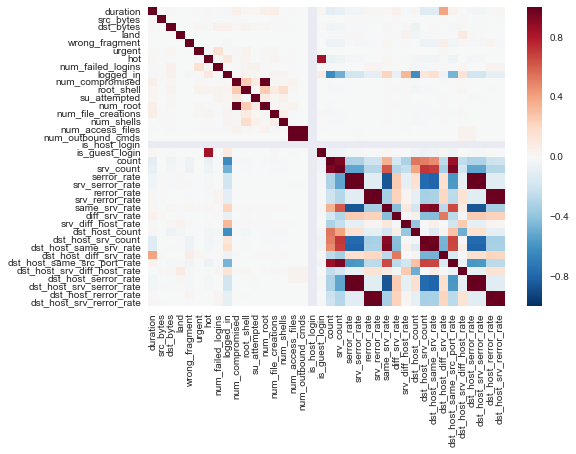

In [11]:
# Correlation Heat Map
import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(dataset_num_features.corr())
plt.show()

In [12]:
# Encoding Categorical Features
def column_encoding(df_num, df_cat):
    for i in range(len(df_cat.columns)):
        df_num = pd.concat([df_num, pd.get_dummies(df_cat.iloc[:, i])], axis=1)
    return df_num

dataset_dummied = column_encoding(dataset_num_features, dataset_cat_features)
len(dataset_dummied.columns)

118

## Exploratory Analysis with P.C.A

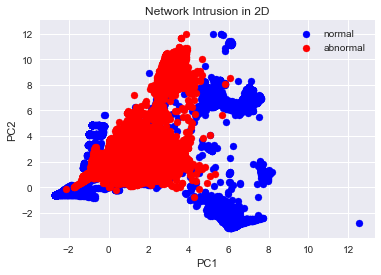

In [13]:
%matplotlib inline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

X_scaled = StandardScaler().fit_transform(dataset_dummied)
pca = PCA(n_components = 2)
X_scaled_pca = pca.fit_transform(X_scaled)

normal_indices = dataset[dataset.TARGET!='normal.'].index.values
abnormal_indices = dataset[dataset.TARGET=='normal.'].index.values
plt.scatter(X_scaled_pca[normal_indices,0], X_scaled_pca[normal_indices,1], c='b')
plt.scatter(X_scaled_pca[abnormal_indices,0], X_scaled_pca[abnormal_indices,1], c='r')
plt.title('Network Intrusion in 2D')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(['normal', 'abnormal'])
plt.show()

In [14]:
# Choose Subspace Dimension
import numpy as np

def kaiser_harris_criterion(cov_mat):
    e_vals, _ = np.linalg.eig(cov_mat)
    return len(e_vals[e_vals > 1])

k_harris_rec = kaiser_harris_criterion(np.cov(X_scaled.T))
print('Kaiser-Harris Criterion: Use {} principal components.'.format(k_harris_rec))

pca.set_params(n_components=k_harris_rec)
pca_harris = pca.fit_transform(X_scaled)

Kaiser-Harris Criterion: Use 70 principal components.


In [ ]:
# Testing a Classifier (Took too long to run on my laptop)
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression

Y_train = dataset.iloc[:,-1].map(lambda x: 1 if x=='normal.' else 0)
stratified_divide = StratifiedKFold(n_splits=10, random_state=1).get_n_splits(y=Y_train)
logistic = LogisticRegression()
score = np.mean(cross_val_score(logistic,
                                pca_harris,
                                Y_train,
                                cv = stratified_divide,
                                scoring = 'accuracy'))
print(score)

In [ ]:
# Confusion Matrix
import sklearn.metrics as met

met.confusion_matrix(Y_train,
                    logistic.fit(pca_harris, Y_train)
                            .predict(pca_harris))

Reference Source: https://github.com/llSourcell/How_to_Make_Data_Amazing/blob/master/demo2.ipynb